# Overview
- MNIST dataset
  + Goal: recognizing handwritten digits
  + Input: a 28x28 image
  + Output: class label (0, 1,..., 9)
- Defining an MLP for MNIST
- Training and evaluating an MLP

# Import libraries

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import SGD

from IPython.display import SVG
from tensorflow.keras.utils import plot_model

import time
import numpy as np
import matplotlib.pyplot as plt

In [28]:
num_classes = 10   # 10 classes: 0, 1,..., 9

# (1) Data

In [29]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# (2) Declare model

In [30]:
# 28x28 MNIST image
input_image = Input(shape=(28, 28), name='Input')

# matrix ---> vector
x = Flatten(name='flatten')(input_image)

# FC layers + dropout
x = Dense(units=512, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2, name='dropout1')(x)

x = Dense(units=512, activation='relu', name='fc2')(x)
x = Dropout(rate=0.2, name='dropout2')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_10ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mnist_mlp')

# print model summary
model.summary()

Model: "mnist_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout2 (Dropout)                   │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc3_10ways_softmax (Dense)           │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

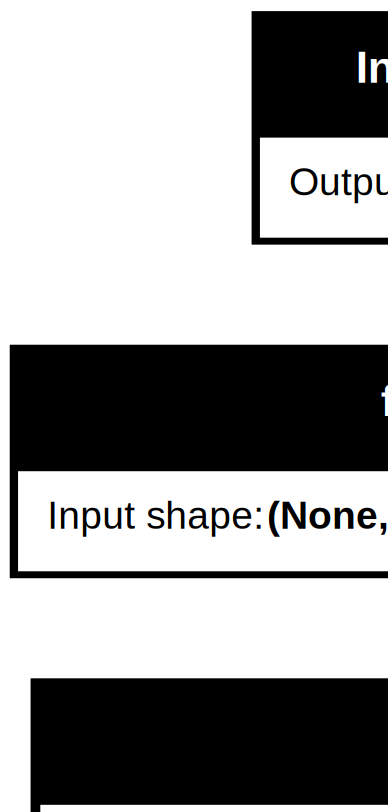

In [33]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# (3) Train defined model
- Note that the training history including loss and accuracy will be save in 'history' variable
- In case your system runs out of memory (OOM), try to decrease batch size

In [34]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.01
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

# train the model
batch_size = 128
epochs = 30

starting_time = time.time()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0902 - val_loss: 0.0883
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0884 - val_loss: 0.0862
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0863 - val_loss: 0.0838
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0840 - val_loss: 0.0811
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0815 - val_loss: 0.0781
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0787 - val_loss: 0.0749
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0758 - val_loss: 0.0712
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0722 - val_loss: 0.0672
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0686 - val_loss: 0.0631
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0647 - val_loss: 0.0589
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0612 - val_loss: 0.0548
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9

### Training time
- Training time with GTX 1080 is about 1.4402 minutes for 30 epochs
- Training time with Core i7 is around 3.0493 minutes for 30 epochs

# (4) Evaluate trained model

In [36]:
score = model.evaluate(x_test, y_test)

if isinstance(score, (list, tuple)):  # Nếu `score` là list/tuple thì truy cập từng phần tử
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
else:  # Nếu `score` là float, chỉ có loss
    print('Test loss:', score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0246
Test loss: 0.021428151056170464


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


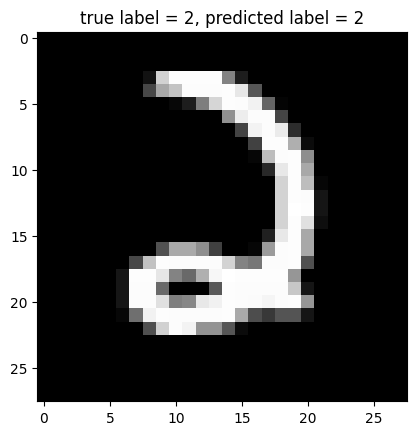

In [37]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img, cmap='gray')
plt.title('true label = %d, predicted label = %d' % (test_label, pred_label))
plt.show()